# Lezione 7: L'Albero Decisionale - Un Modello Trasparente 🌳

Nella prima lezione, abbiamo creato a mano un "indovina-animale" con una serie di domande `if/else`. Quel programma era un albero decisionale manuale. Ora vedremo come un algoritmo di Machine Learning può **imparare da solo la migliore sequenza di domande** da porre per classificare i dati.

L'albero decisionale è uno dei modelli più intuitivi e interpretabili, per questo viene definito un modello **"scatola bianca" (white box)**: possiamo aprirlo e guardare esattamente come e perché prende una certa decisione.

**Nuovo Esempio: Classifichiamo i Pinguini!**
Useremo un dataset famoso e divertente che contiene le misure di tre diverse specie di pinguini. Il nostro obiettivo è creare un modello che, date le misure di un pinguino, ne indovini la specie.

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

# Carichiamo il dataset "penguins"
df_penguins = sns.load_dataset('penguins')

# Rimuoviamo le righe con dati mancanti per semplicità
df_penguins = df_penguins.dropna()

# Definiamo le nostre feature (X) e il nostro target (y)
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
target = 'species'

X = df_penguins[features]
y = df_penguins[target]

# Dividiamo i dati in set di addestramento e di test
# Il modello imparerà sul training set e lo valuteremo sul test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


print("Dimensioni del training set:", X_train.shape)
print("Dimensioni del test set:", X_test.shape)

print("\nEcco le prime righe del nostro dataset di pinguini:")
display(df_penguins.head())

Dimensioni del training set: (233, 4)
Dimensioni del test set: (100, 4)

Ecco le prime righe del nostro dataset di pinguini:


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


Come fa l'algoritmo a scegliere la domanda migliore ad ogni passo (es. "la lunghezza del becco è <= 40mm?")?

L'obiettivo è trovare una domanda che divida i dati in due gruppi che siano il più **"puri"** possibile. Un gruppo è "puro" se contiene quasi esclusivamente campioni di una sola classe.

**Analogia:** Immagina di avere una scatola con 50 biglie rosse e 50 biglie blu. Se trovi una regola che ti permette di separarle in due scatole, una con 40 rosse e 10 blu, e l'altra con 10 rosse e 40 blu, hai creato dei gruppi più "puri" di quello iniziale. L'algoritmo cerca la regola che massimizza questa purezza ad ogni divisione.

✅ Modello ad albero addestrato!


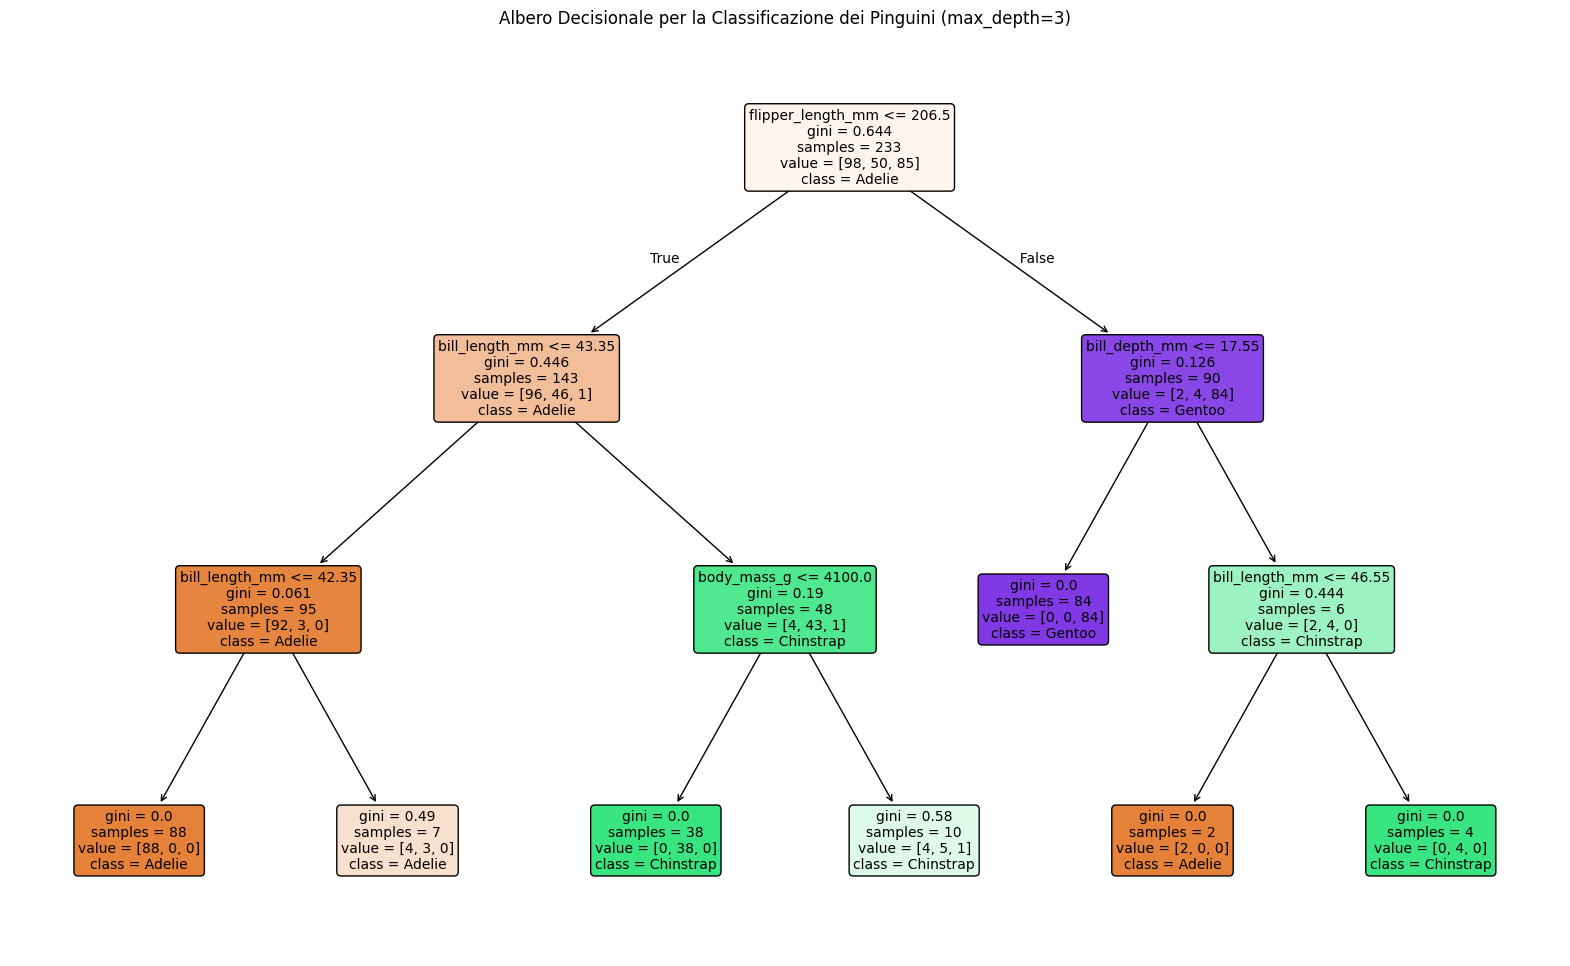

In [2]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# 1. Creiamo il modello
# Impostiamo max_depth=3 per non creare un albero troppo grande e illeggibile.
# Questo ci mostrerà solo le 3 domande più importanti.
modello_albero = DecisionTreeClassifier(max_depth=3, random_state=42)

# 2. Addestriamo il modello SUL TRAINING SET
modello_albero.fit(X_train, y_train)

print("✅ Modello ad albero addestrato!")

# 3. Visualizziamo l'albero che ha imparato!
plt.figure(figsize=(20, 12))
plot_tree(modello_albero,
          feature_names=features,
          class_names=y.unique(),
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Albero Decisionale per la Classificazione dei Pinguini (max_depth=3)")
plt.show()

### Come si Legge l'Albero?
Ogni riquadro è un **nodo**.
* **Nodo Radice (in cima)**: È la prima domanda che l'algoritmo ha ritenuto più importante per separare i dati.
* **Nodi Interni**: Sono le domande successive.
* **Nodi Foglia (in fondo)**: Sono i nodi senza ulteriori divisioni, rappresentano la decisione finale.

Dentro ogni nodo vedi:
* La **domanda** (es. `flipper_length_mm <= 206.5`). Se è vero, vai a sinistra, altrimenti vai a destra.
* `samples`: Quanti campioni del training set sono arrivati in quel nodo.
* `value`: Come sono distribuiti i campioni tra le classi (es. [40, 50, 45]).
* `class`: La classe maggioritaria in quel nodo, che sarebbe la predizione se l'albero si fermasse lì.

**Valutiamo il nostro modello**
Ora che abbiamo un modello addestrato, vediamo quanto è bravo a classificare i pinguini del test set, che non ha mai visto prima.

In [3]:
from sklearn.metrics import accuracy_score

# Facciamo previsioni sul test set
y_pred = modello_albero.predict(X_test)

# Calcoliamo l'accuratezza
accuratezza = accuracy_score(y_test, y_pred)

print(f"L'accuratezza del nostro albero decisionale sul test set è: {accuratezza:.2%}")

# Proviamo a predire un singolo pinguino nuovo
pinguino_nuovo = [[39.5, 17.4, 186.0, 3750.0]] # Misure simili a un pinguino 'Adelie'
predizione_singola = modello_albero.predict(pinguino_nuovo)
print(f"\nPredizione per un nuovo pinguino con misure {pinguino_nuovo}: Specie '{predizione_singola[0]}'")

L'accuratezza del nostro albero decisionale sul test set è: 98.00%

Predizione per un nuovo pinguino con misure [[39.5, 17.4, 186.0, 3750.0]]: Specie 'Adelie'


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
